In [1]:
# Checking the kernel
# These are uncertain times :)
+(2, 2)

4

# Using Julia 1.0 for introductory statistics

## Introduction

Julia is well suited to general purpose data analysis.  It has many built-in statistical functions and there are many packages that greatly extend the capabilities of Julia as a scientific programming language for statistics.

In this section we will take a look at introductory statistics using Julia 1.0.  There are differences between this version of Julia and version 0.6.  Not all the packages that are available for version 0.6 and prior, are quite ready for version 1.0.  At the time of recording the packages that are used in this section do all compile and can be used.

In the first part of this section of the course, we will take a look at creating our own data for statistical analysis.  It is great to be able to generate simulated data, especially when you are just starting out and might not have access to proper datasets.

When viewing a new dataset, it is alway good to start by describing it.  Human beings are not designed to look at large tables of data and understand what it is trying to tell us.  Using summarizing, or descriptive, statistics helps us to gain an insight into the data before we start to analyze it.

This section will also look at visualizing data.  It many cases, this allows for an even better understanding of the data.

The `HypothesisTests` and `GLM` packages allow us to do many common statistical tests and we will have a look at Student's _t_ test, linear regression models, and the $\chi^2$ test for independence.

We will conclude with a look at exporting our data in the form of a spreadsheet.  Let's start, though, by importing the packages that we will be using.

## Adding packages

If the packages that are listed below are not installed on your system, then do the following for each package, i.e. `PyPlot`.

```
using Pkg;
Pkg.add("PyPlot")
```

In [2]:
using Distributions  # Create random variables
using StatsBase  # Basic statistical support
using CSV  # Reading and writing CSV files
using DataFrames  # Create a data structure
using HypothesisTests  # Perform statistical tests
using StatPlots
using GLM  # General linear models
pyplot()

┌ Info: Precompiling Distributions [31c24e10-a181-5473-b8eb-7969acd0382f]
└ @ Base loading.jl:1189


ArgumentError: ArgumentError: Package StatsBase not found in current path:
- Run `import Pkg; Pkg.add("StatsBase")` to install the StatsBase package.


## Creating random variable

We mentioned in the introduction that the creation of simulated data is a great way to start learning how to use Julia for statistics.  In the code below, we create five variables with random data point values.

In [5]:
age = rand(18:80, 100);  # Uniform distribution
wcc = round.(rand(Distributions.Normal(12, 2), 100), digits = 1)  # Normal distribution & round to one decimal place
crp = round.(Int, rand(Distributions.Chisq(4), 100)) .* 10  # Chi-squared distribution with broadcasting & alternate round()
treatment = rand(["A", "B"], 100); # Uniformly weighted
result = rand(["Improved", "Static", "Worse"], 100);  # Uniformly weighted

## Descriptive statistics

While there are common statistical function in Julia such as `mean()` and `std()`, it is more convenient to use the `describe()` function from the `StatsBase` package.

In [31]:
# Mean of the age variable
mean(age)

51.02

In [6]:
# Descriptive statistics of the age variable
StatsBase.describe(age)

Summary Stats:
Mean:           51.020000
Minimum:        18.000000
1st Quartile:   36.750000
Median:         51.500000
3rd Quartile:   68.250000
Maximum:        80.000000
Length:         100
Type:           Int64


In [7]:
# The summarystats() function omits the length and type
StatsBase.summarystats(wcc)

Summary Stats:
Mean:           12.395000
Minimum:        7.100000
1st Quartile:   10.800000
Median:         12.600000
3rd Quartile:   13.900000
Maximum:        17.300000


## Creating a dataframe

When creating simulated data, it is best to store it in a dataframe object for easier manipulation.

In [9]:
data = DataFrame(Age = age, WCC = wcc, CRP = crp, Treatment = treatment, Result = result);

In [11]:
# Number of rows and columns
size(data)

(100, 5)

In [10]:
# First six rows
head(data)

,Age,WCC,CRP,Treatment,Result
,Int64,Float64,Int64,String,String
1,76,14.4,30,B,Improved
2,47,12.9,60,A,Static
3,79,11.7,50,A,Worse
4,47,11.2,50,B,Improved
5,52,7.1,40,B,Static
6,20,12.8,50,A,Improved


We can create dataframe objects by selecting only subjects according to their data point values for a particular variable.

In [12]:
dataA = data[data[:Treatment] .== "A", :]  # Only patient in treatment group A
dataB = data[data[:Treatment] .== "B", :];  # Only patient in treatment group B

## Descriptive statistics using the dataframe object

The `describe()` function will attempt to provide descriptive statistics of the a data object.

In [30]:
describe(data)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Nothing,DataType
1,Age,51.02,18,51.5,80,,,Int64
2,WCC,11.736,7.1,11.8,17.0,,,Float64
3,CRP,40.8,0,40.0,120,,,Int64
4,Treatment,,A,,B,2,,String
5,Result,,Improved,,Worse,3,,String


We can count the number of the elements in the sample space of a categorical variable using the `by()` function.

In [32]:
# Counting the number of patients in groups A and B
by(data, :Treatment, df -> DataFrame(N = size(df, 1)))

,Treatment,N
,String,Int64
1,B,43
2,A,57


In [33]:
# The size argument will give the same output other than adding the number of variables
by(data, :Treatment, size)

,Treatment,x1
,String,Tuple…
1,B,"(43, 5)"
2,A,"(57, 5)"


The usual descriptive statistics of a numerical variable can be calculated after separation by a categorical variable.

In [28]:
# Mean age of groups A and B patients
by(data, :Treatment, df -> mean(df.Age))

,Treatment,x1
,String,Float64
1,B,51.8372
2,A,50.4035


In [29]:
# Standard deviation of groups A and B patients
by(data, :Treatment, df -> std(df.Age))

,Treatment,x1
,String,Float64
1,B,18.6483
2,A,19.6422


By using the `summarystats()` function we can get all the descriptive statistics.

In [34]:
by(data, :Treatment, df -> describe(df.Age))

Summary Stats:
Mean:           51.837209
Minimum:        18.000000
1st Quartile:   40.000000
Median:         52.000000
3rd Quartile:   68.000000
Maximum:        79.000000
Length:         43
Type:           Int64
Summary Stats:
Mean:           50.403509
Minimum:        18.000000
1st Quartile:   34.000000
Median:         50.000000
3rd Quartile:   68.000000
Maximum:        80.000000
Length:         57
Type:           Int64


,Treatment,x1
,String,Nothing
1,B,
2,A,


## Visualizing the data

The Plots package works well with the DataFrames package by allowing macro function from the latter.  In the code cell below, we look at the age distribution of the two treatment groups.

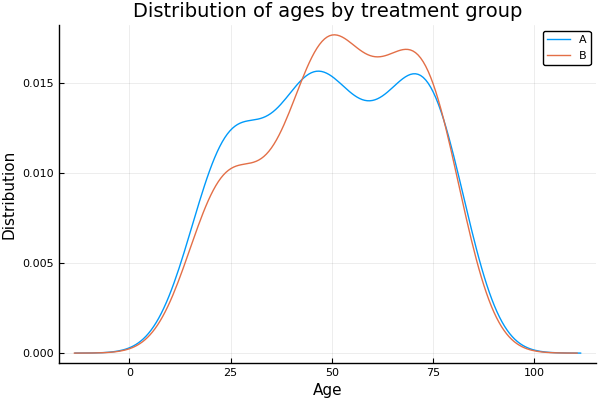

In [35]:
@df data density(:Age, group = :Treatment, title = "Distribution of ages by treatment group",
    xlab = "Age", ylab = "Distribution",
    legend = :topright)

We can do the same for the results groups.

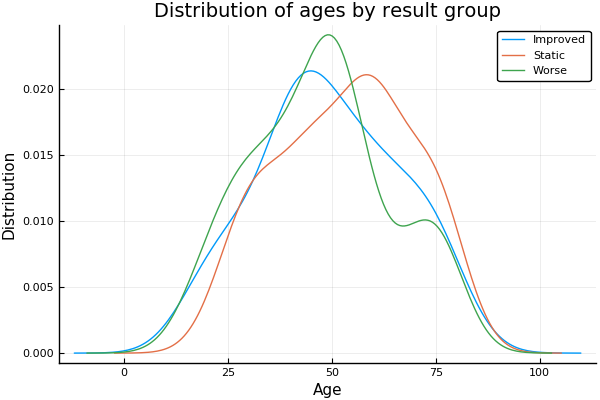

In [17]:
@df data density(:Age, group = :Result, title = "Distribution of ages by result group",
    xlab = "Age", ylab = "Distribution",
    legend = :topright)

We can even discriminate between all of the groups.

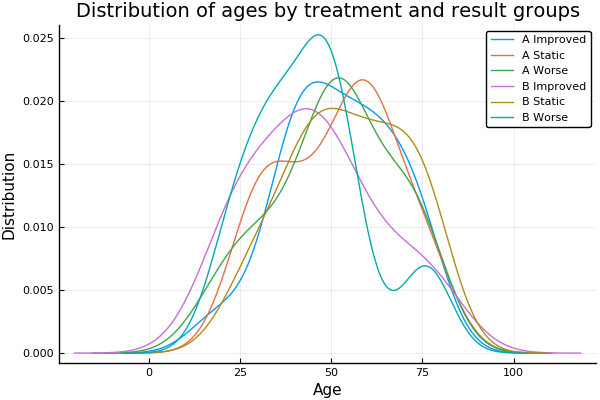

In [18]:
@df data density(:Age, group = (:Treatment, :Result), title = "Distribution of ages by treatment and result groups",
    xlab = "Age", ylab = "Distribution",
    legend = :topright)

Let's create a box-and-whisker plot of the white cell count per treatment group and then per result group.

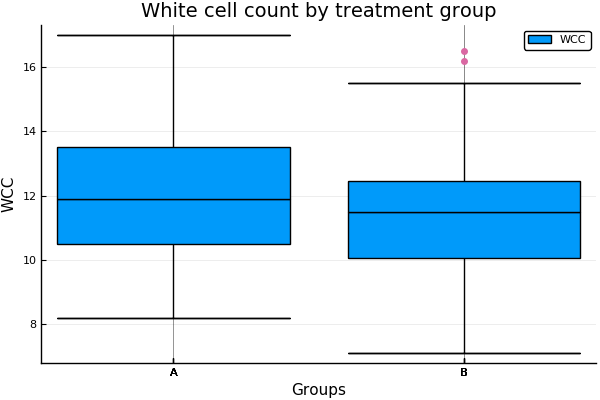

In [37]:
@df data boxplot(:Treatment, :WCC, lab = "WCC", title = "White cell count by treatment group",
    xlab = "Groups", ylab = "WCC")

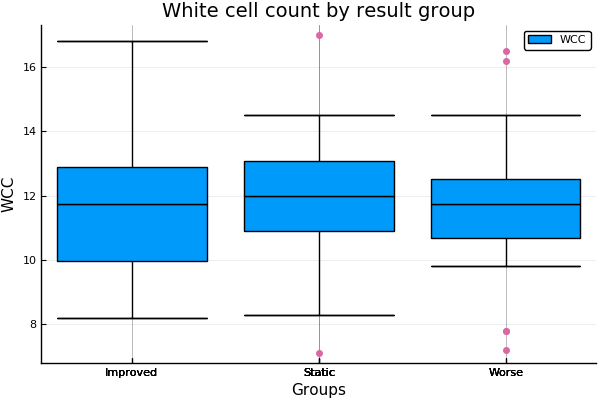

In [81]:
@df data boxplot(:Result, :WCC, lab = "WCC", title = "White cell count by result group",
    xlab = "Groups", ylab = "WCC")

Finally, we will check on the correlation between the numerical variables using a correlation plot and a corner plot.

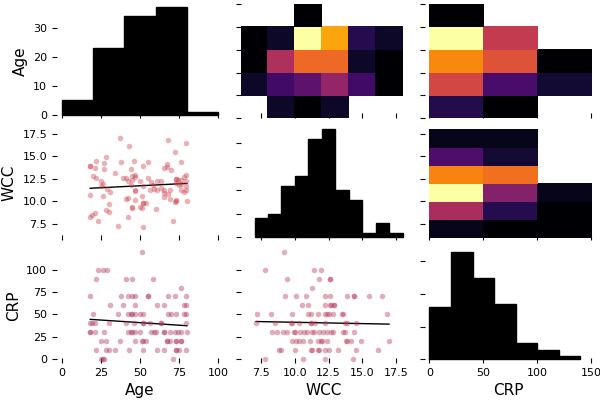

In [83]:
@df data corrplot([:Age :WCC :CRP], grid = false)  # No comma's between arguments in list

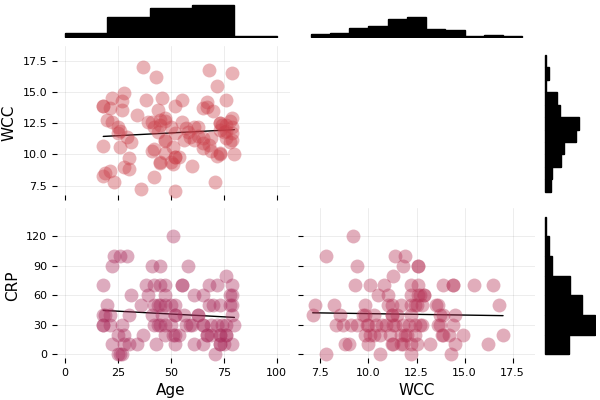

In [85]:
@df data cornerplot([:Age :WCC :CRP], grid = false, compact = true)

## Inferential statistics

We will begin by using Student's _t_ test to compare the mean of a numerical variable between two groups. 

In [100]:
# Difference in age between patients in groups A and B
EqualVarianceTTest(dataA[:Age], dataB[:Age])

Two sample t-test (equal variance)
----------------------------------
Population details:
    parameter of interest:   Mean difference
    value under h_0:         0
    point estimate:          -1.433700530395761
    95% confidence interval: (-9.1389, 6.2715)

Test summary:
    outcome with 95% confidence: fail to reject h_0
    two-sided p-value:           0.7127

Details:
    number of observations:   [57,43]
    t-statistic:              -0.36924906435154703
    degrees of freedom:       98
    empirical standard error: 3.882746549171464


In [87]:
# Only the p value for the difference in white cell count between patients in groups A and B
pvalue(EqualVarianceTTest(dataA[:WCC], dataB[:WCC]))

0.21535402828596004

In [117]:
# Difference in c-reactive protein level between patients in groups A and B for unequal variances
UnequalVarianceTTest(dataA[:CRP], dataB[:CRP])

Two sample t-test (unequal variance)
------------------------------------
Population details:
    parameter of interest:   Mean difference
    value under h_0:         0
    point estimate:          2.219502243982049
    95% confidence interval: (-8.3849, 12.824)

Test summary:
    outcome with 95% confidence: fail to reject h_0
    two-sided p-value:           0.6784

Details:
    number of observations:   [57,43]
    t-statistic:              0.41611518584761104
    degrees of freedom:       85.39203254013825
    empirical standard error: 5.333865043788311


We can create a variety of linear models using the `GLM.fit()` function.

In [113]:
# Simple model predicting CRP
fit(LinearModel, @formula(CRP ~ 1), data)

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: CRP ~ +1

Coefficients:
             Estimate Std.Error t value Pr(>|t|)
(Intercept)      40.8   2.59245  15.738   <1e-27


In [114]:
# Adding Age as a predictor variable
fit(LinearModel, @formula(CRP ~ Age), data)

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: CRP ~ 1 + Age

Coefficients:
              Estimate Std.Error   t value Pr(>|t|)
(Intercept)    46.6694   7.42469    6.2857    <1e-8
Age          -0.115041  0.136338 -0.843789   0.4008


In [115]:
# Adding Age and WCC as predictor variables
fit(LinearModel, @formula(CRP ~ Age + WCC), data)

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: CRP ~ 1 + Age + WCC

Coefficients:
              Estimate Std.Error   t value Pr(>|t|)
(Intercept)    49.0521   16.0701   3.05239   0.0029
Age          -0.113196  0.137462 -0.823468   0.4123
WCC          -0.211049   1.26065 -0.167413   0.8674


We can conduct a $\chi^2$ test for independence using the `HypothesisTests.ChisqTest()` function.  First we need to look at the counts.  Below we calculate the number of unique values for the Result variable sample space for patients in groups A and B.

In [104]:
by(dataA, :Result, df -> DataFrame(N = size(df, 1)))

,Result,N
,String,Int64
1,Static,17
2,Worse,18
3,Improved,22


In [105]:
by(dataB, :Result, df -> DataFrame(N = size(df, 1)))

,Result,N
,String,Int64
1,Improved,18
2,Static,11
3,Worse,14


In [108]:
# Enter the data in similar order here
observed = reshape([22, 17, 18, 18, 11, 14], (2, 3))
observed

2×3 Array{Int64,2}:
 22  18  11
 17  18  14

In [109]:
ChisqTest(observed)

Pearson's Chi-square Test
-------------------------
Population details:
    parameter of interest:   Multinomial Probabilities
    value under h_0:         [0.1989, 0.1911, 0.1836, 0.1764, 0.1275, 0.1225]
    point estimate:          [0.22, 0.17, 0.18, 0.18, 0.11, 0.14]
    95% confidence interval: Tuple{Float64,Float64}[(0.13, 0.3184), (0.08, 0.2684), (0.09, 0.2784), (0.09, 0.2784), (0.02, 0.2084), (0.05, 0.2384)]

Test summary:
    outcome with 95% confidence: fail to reject h_0
    one-sided p-value:           0.6183

Details:
    Sample size:        100
    statistic:          0.9614102051076865
    degrees of freedom: 2
    residuals:          [0.473113, -0.482672, -0.0840168, 0.0857143, -0.490098, 0.5]
    std. residuals:     [0.865371, -0.865371, -0.15003, 0.15003, -0.808452, 0.808452]


## Exporting a CSV file

Finally we can export our dataframe object as a spreadsheet file.

In [121]:
CSV.write("ProjectData_1_point_0.csv", data);